In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# Reading data from remote link
url_Dataset = "http://bit.ly/w-data"
DataSet = pd.read_csv(url_Dataset)
print("Data imported successfully")
print(f"Dataset are {len(DataSet)} rows")

Data imported successfully
Dataset are 25 rows


In [3]:
DataSet.head(13)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
DataSet.tail(12)

,Hours,Scores
13,3.3,42
14,1.1,17
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35


In [5]:
DataSet.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
DataSet.isnull().sum() #Check if there is any data that has null values

Hours     0
Scores    0
dtype: int64

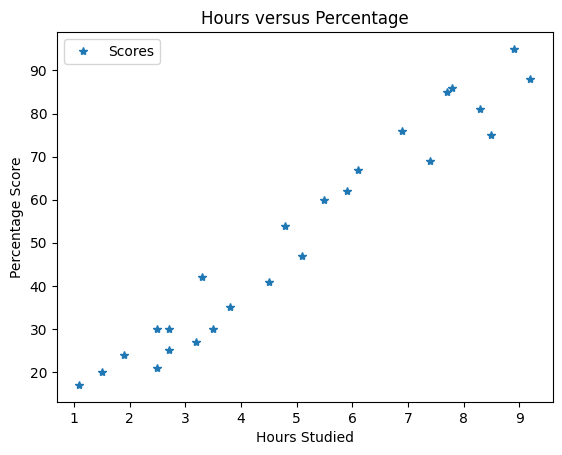

In [7]:
DataSet.plot(x='Hours', y='Scores',style='*')
plt.title('Hours versus Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [8]:
X = DataSet.iloc[:, :-1].values
y = DataSet.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training is Done.")

Training is Done.


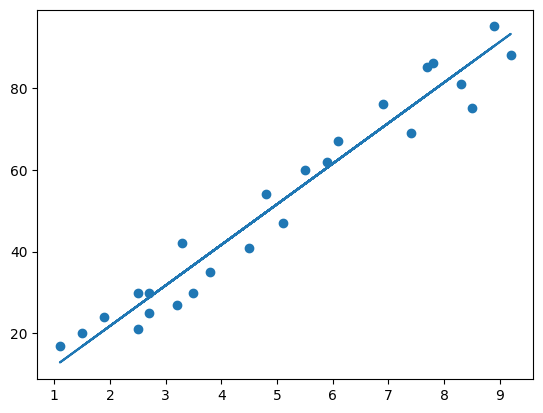

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [11]:
print(X_test) # Print test data in hrs
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
# prompt: make user enter number either as integer and decimal

hours = input("Enter the number of hours studied: ")
try:
  hours = int(hours)
except ValueError:
  try:
    hours = float(hours)
  except ValueError:
    print("Invalid input")
    hours = None

own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the number of hours studied: 9.25
No of Hours = 9.25
Predicted Score = 93.69173248737539


In [14]:
# Evaluate Model
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
